In [16]:
#generating a sample_dataset for learning purpose
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=1000,n_features=20,#pta hai.
                          n_informative=15,n_redundant=5,#ye kya hai??
                          random_state=7)#ye bhi pta hai.
print(x.shape,y.shape)

(1000, 20) (1000,)


# nominclature of diff subsets of dataset
# 1) y_test == y_test_actual 
# 2) y_test_p = y_test_predicted

# 1) y_train == y_train_actual 
# 2) y_train_p = y_train_predicted


In [17]:
#scaling the x only (ie, independent features, kyoki inko model me daalna hai and y ko nahi)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

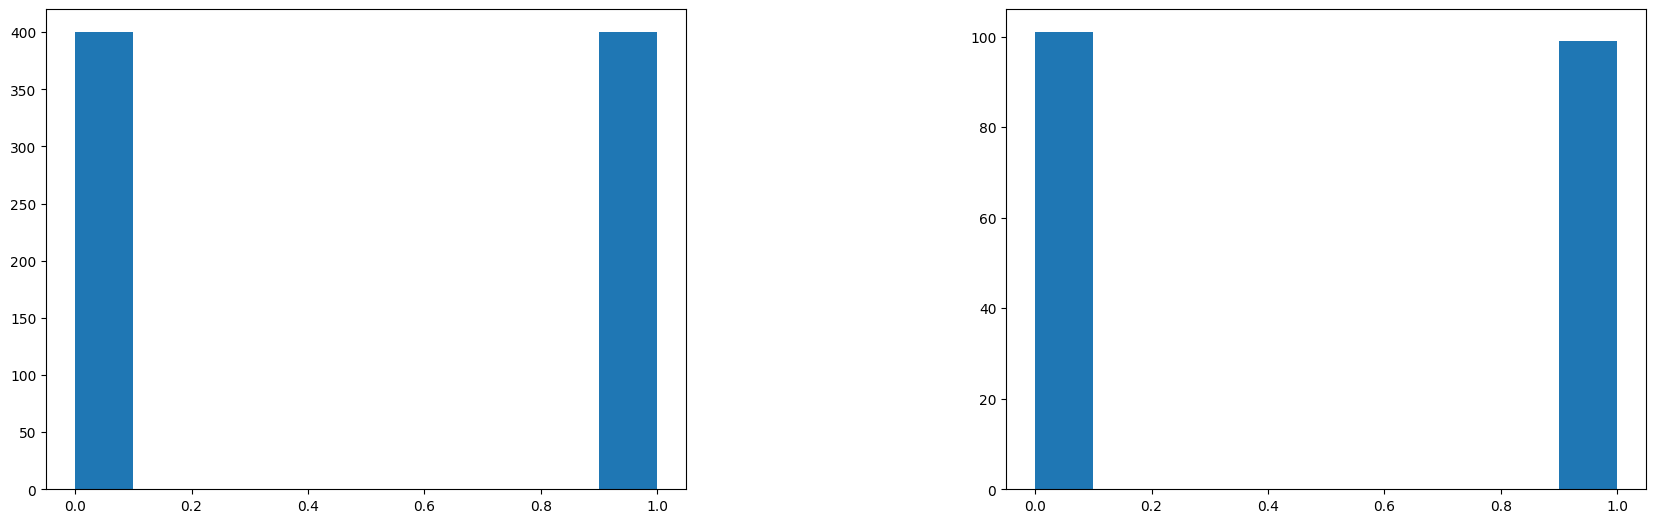

In [18]:
#splitting data for training and testing separatly
from sklearn.model_selection import train_test_split
x_train, x_test, ay_train, ay_test = train_test_split(x, y, test_size=0.2, random_state=1)

import matplotlib.pyplot as plt
fig = plt.figure()

axes1 = fig.add_axes(rect=[0,0,1,1])
axes2 = fig.add_axes(rect=[1.5,0,1,1])
axes1.hist(ay_train)
axes2.hist(ay_test)

plt.show()
# plt.hist(ay_train)

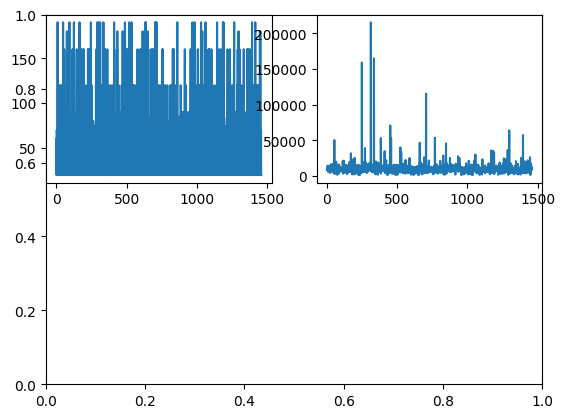

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('HousePrice_SampleData.csv')
# data.hist(color='b', alpha=0.5) # bins=10
fig, ax = plt.subplots()

# data.info()
ax = fig.add_subplot(221)
ax1 = fig.add_subplot(222)
ax.plot(data['MSSubClass'])
ax1.plot(data['LotArea'])

In [ ]:
i=0
for i in range(221,len(data.columns)):
    ax = fig.add_subplot(i)
    ax.plot(data.loc[i])
    i=i+1

In [31]:
display(data.loc[1])

Id                    2
MSSubClass           20
MSZoning             RL
LotFrontage        80.0
LotArea            9600
                  ...  
MoSold                5
YrSold             2007
SaleType             WD
SaleCondition    Normal
SalePrice        181500
Name: 1, Length: 81, dtype: object

C:\Users\sarve\AppData\Local\Temp\ipykernel_3536\3920060972.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()  # Improves appearance a bit.


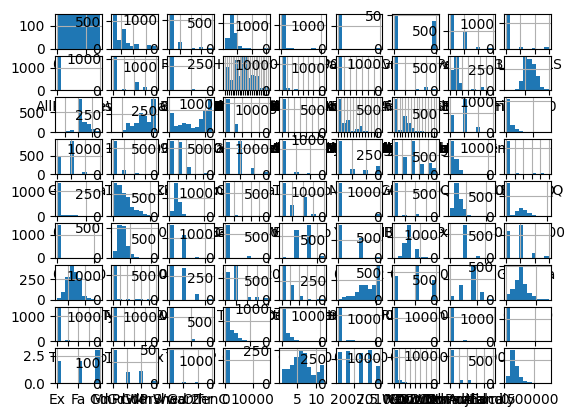

In [38]:
import pandas as pd
data = pd.read_csv('HousePrice_SampleData.csv')

import numpy as np
import matplotlib.pyplot as plt

def draw_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure()
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(ax=ax)
        # ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

# data = pd.DataFrame(np.random.randn(30, 9), columns=map(str, range(9)))

# len(data.columns)
draw_histograms(data, data.columns, 9, 9)



In [ ]:
#training LogReg model with x_train and y_train
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,ay_train)

LogisticRegression()

In [ ]:
# accuracy check for train and test dataSubsets
from sklearn.metrics import accuracy_score
py_train = model.predict(x_train)
acc_train = accuracy_score(ay_train, py_train) 
print("acc_train: ", acc_train)

py_test = model.predict(x_test)
acc_test = accuracy_score(ay_test, py_test)
print("acc_test: ", acc_test)

acc_train:  0.8475
acc_test:  0.85


In [ ]:
# finalizing the model
import pickle
pickle.dump(model, open('model.pkl','wb'))

In [ ]:
# loading the model again and testing predictions
pickled_model = pickle.load(open('model.pkl','rb'))
pickled_model.predict(x_test)

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1])